#决策树分类

##读取数据

In [1]:
import pandas as pd
data = pd.read_csv('dota2Train.csv', header=None)
x = data.iloc[:,2:].values
y = data.iloc[:,0].values

In [2]:
x.shape

(92650, 115)

In [3]:
y.shape

(92650,)

In [4]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=7)
clf.fit(x,y)

DecisionTreeClassifier(max_depth=7)

In [5]:
feature_names = ["game mode","game type"]
for i in range(1,114):
    feature_names.append(str(i))
target_names = ["loss","win"]

##决策树可视化

In [6]:
import graphviz
from sklearn import tree
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\graphviz-2.38\\bin'

dot_data = tree.export_graphviz(clf,out_file=None,feature_names=feature_names,class_names=target_names,filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decisionTree",view=True)

'decisionTree.pdf'

##各属性重要性可视化

In [7]:
import numpy as np
y_importances = clf.feature_importances_
x_importances = feature_names
y_pos = np.arange(len(x_importances))

In [8]:
import matplotlib.pyplot as plt

def draw_bar(flag,y_importances,x_importances,y_pos):
    if flag:
        num = 67
        y_importances = y_importances[:num]
        x_importances = x_importances[:num]
        y_pos = y_pos[:num]
    else:
        num = 67
        y_importances = y_importances[num:]
        x_importances = x_importances[num:]
        y_pos = y_pos[:len(x_importances)]
    plt.figure(figsize=(20,5))
    plt.bar(y_pos, y_importances, width=0.4, align='center', alpha=0.4)
    plt.xticks(y_pos, x_importances)
    plt.ylabel('Importances')
    plt.ylim(0,0.1)
    plt.title('Features Importances')
    plt.show()

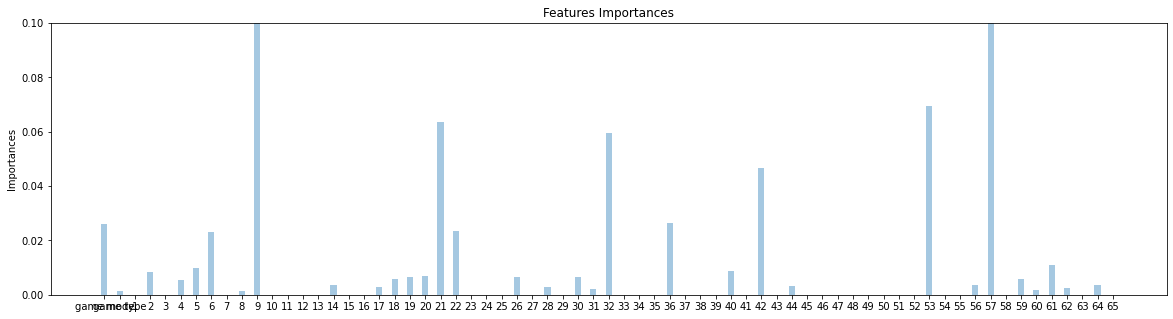

In [9]:
draw_bar(1,y_importances,x_importances,y_pos)

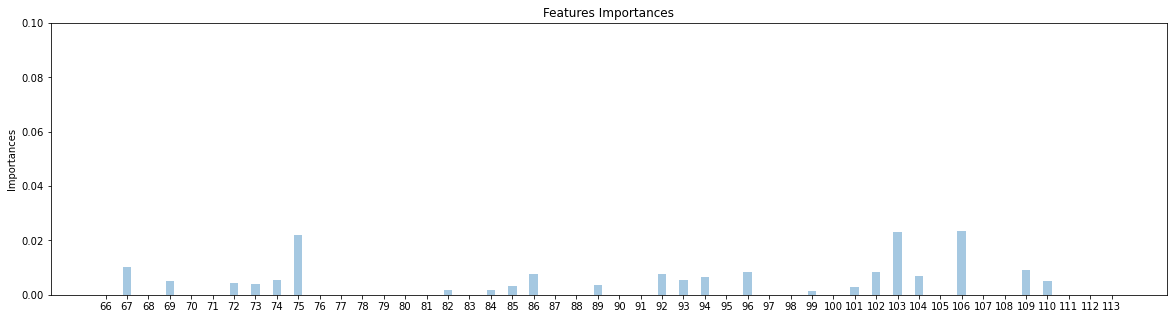

In [10]:
draw_bar(0,y_importances,x_importances,y_pos)

##各英雄胜率可视化

In [11]:
winrate = []
for i in range(2,115):
    # 对方选，输了
    a = np.sum(np.multiply(x[:,i]==-1,y==-1))
    # 对方选，赢了
    b = np.sum(np.multiply(x[:,i]==-1,y==1))
    # 自己选，输了
    c = np.sum(np.multiply(x[:,i]==1,y==-1))
    # 自己选，赢了
    d = np.sum(np.multiply(x[:,i]==1,y==1))
    if (a+b+c+d) == 0:
        winrate.append(0)
    else:
        winrate.append((b+d)/(a+b+c+d))

In [12]:
def draw_bar2(flag,shenglv):
    if flag:
        num = 65
        x_importances = []
        for i in range(1,num+1):
            x_importances.append(str(i))
        y_importances = shenglv[:num]
        y_pos = np.arange(len(x_importances))
    else:
        num = 65
        x_importances = []
        for i in range(num+1,114):
            x_importances.append(str(i))
        y_importances = shenglv[num:]
        y_pos = np.arange(len(x_importances))
    plt.figure(figsize=(20,5))
    plt.bar(y_pos, y_importances, width=0.4, align='center', alpha=0.4)
    plt.xticks(y_pos, x_importances)
    plt.ylabel('Importances')
    # plt.ylim(0,0.1)
    plt.title('Features Importances')
    plt.show()

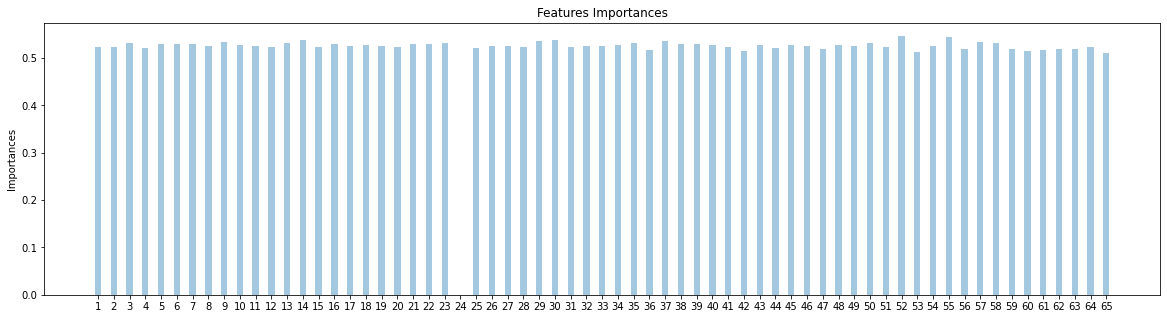

In [13]:
draw_bar2(1,winrate)

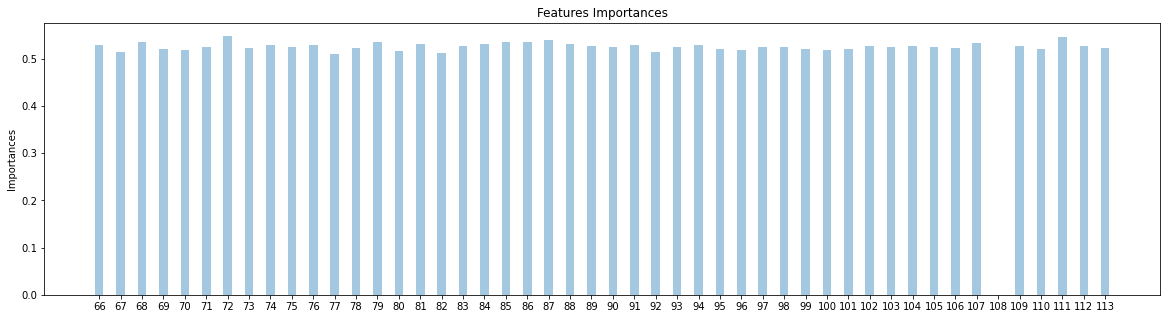

In [14]:
draw_bar2(0,winrate)

In [15]:
import pandas as pd
data = pd.read_csv("dota2Test.csv")
x2 = data.iloc[:,2:].values
y2 = data.iloc[:,0].values

In [16]:
clf.score(x2,y2)

0.5489167395317206

In [17]:
ybar = clf.predict(x2)

In [18]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score

print("准确率：",accuracy_score(y2,ybar))
print("召回率：",recall_score(y2,ybar))
print("F1 score：",f1_score(y2,ybar))
print("precision:",precision_score(y2, ybar, average='macro', pos_label=1))

准确率： 0.5489167395317206
召回率： 0.8326063249727372
F1 score： 0.663672582397682
precision: 0.5444571103137027
